# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns


In [70]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [71]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [72]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

Estadísticas descriptivas (numéricas):
              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000
mean   14538.403716   2013.553883   52509.430395
std     3922.420961      3.116585   36791.736601
min     5002.000000   1998.000000       5.000000
25%    11999.000000   2012.000000   26461.000000
50%    15000.000000   2014.000000   41680.000000
75%    16999.000000   2016.000000   71355.500000
max    32444.000000   2018.000000  232658.000000

Histograma de precios:


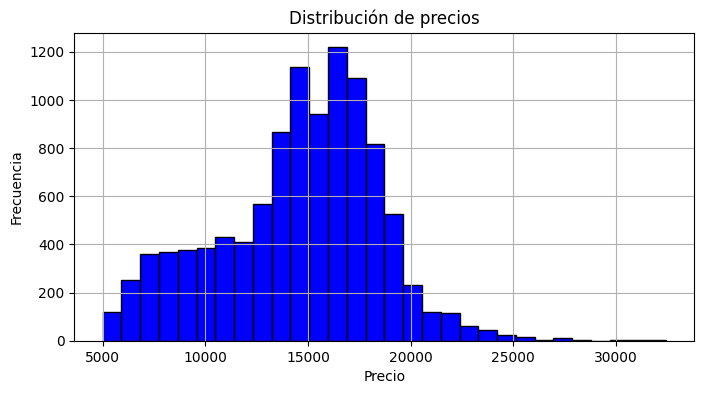


Relación de precios con año:


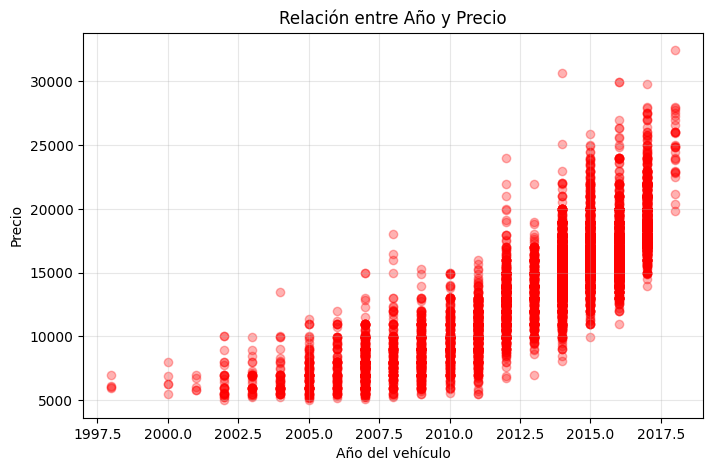


Matriz de correlación:


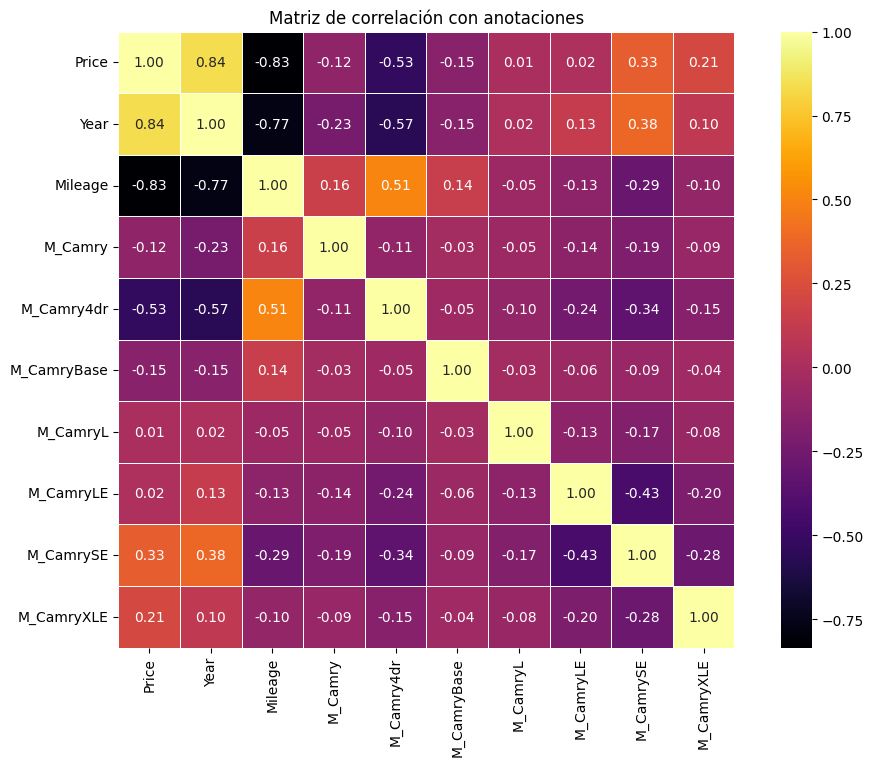

In [73]:
# celda 0 - exploracion y analisis de datos
print("Valores nulos por columna:")
print(data.isnull().sum())

print("\nEstadísticas descriptivas (numéricas):")
print(data.describe())

print("\nHistograma de precios:")
plt.figure(figsize=(8, 4))
plt.hist(data['Price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print("\nRelación de precios con año:")

plt.figure(figsize=(8,5))
plt.scatter(data['Year'], data['Price'], alpha=0.3, color='red')
plt.title('Relación entre Año y Precio')
plt.xlabel('Año del vehículo')
plt.ylabel('Precio')
plt.grid(True, alpha=0.3)
plt.show()

print("\nMatriz de correlación:")
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='inferno', square=True, linewidths=0.5)
plt.title('Matriz de correlación con anotaciones')
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [74]:
# Celda 1
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nDesempeño del modelo base:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Desempeño del modelo base:
MAE: 1314.4207078056425
RMSE: 1765.4118259983413
R²: 0.7962441677396794


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [75]:
# Celda 2
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [76]:
#Encontrar los mejores hiperparametros: 
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

#Entrenar el modelo con los mejores hiperparámetros encontrados:

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nDesempeño del modelo calibrado:")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:.3f}")


Mejores hiperparámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

Desempeño del modelo calibrado:
RMSE: 1,564.25
MAE: 1,147.20
R²: 0.840



Gráfico de las 10 variables más importantes:


<Axes: xlabel='Importancia', ylabel='Variable'>

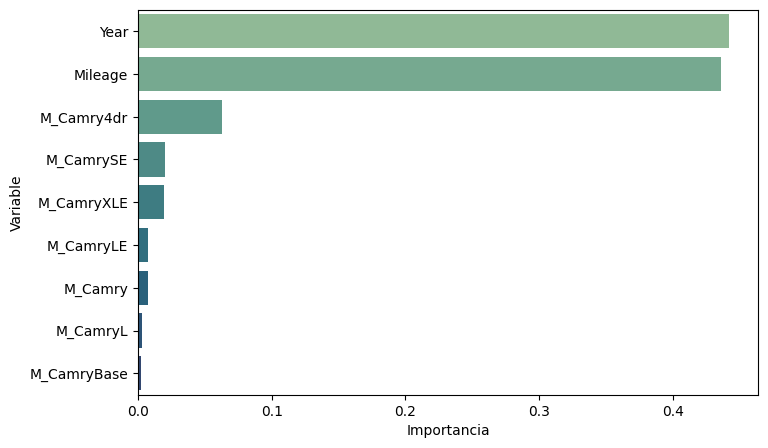

In [77]:
#Importancia de los predictores

importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': best_rf.feature_importances_
}).sort_values('Importancia', ascending=False)


print("\nGráfico de las 10 variables más importantes:")
plt.figure(figsize=(8,5))
sns.barplot(
    data=importancias.head(10),
    x='Importancia', y='Variable',
    palette='crest'
)


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

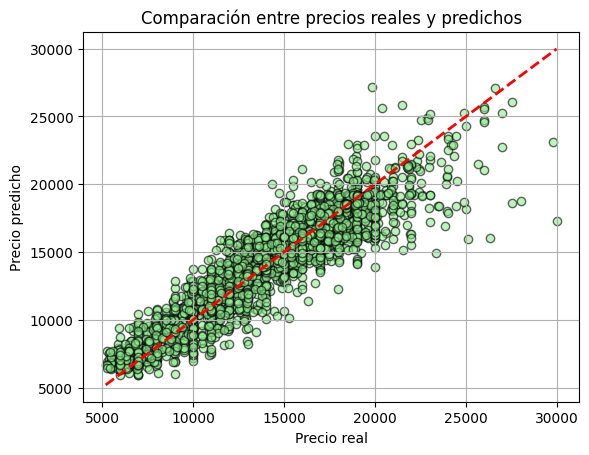


Conclusiones:

El modelo de Random Forest calibrado alcanzó un desempeño destacado, con un R² de 0.84, lo que demuestra que explica aproximadamente el 84 % de la variación en los precios de los vehículos

El error absoluto medio (MAE) de 1,147 indica que en promedio las predicciones del modelo se desvían muy poco del valor real, lo que refleja una buena precisión individual

El RMSE de 1,564 muestra que los errores más grandes se mantienen controlados, evidenciando que el modelo no presenta desviaciones extremas ni sobreajuste.

En comparación con el modelo base (R² = 0.79, RMSE = 1,765 y MAE = 1,314), la calibración mejoró de forma significativa la capacidad predictiva

El gráfico de dispersión entre precios reales y predichos muestra una alineación cercana a la línea ideal, especialmente en el rango medio de precios, evidenciando la efectividad del modelo


In [ ]:
#celda 3
plt.scatter(y_test, y_pred, alpha=0.6, color='lightgreen', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación entre precios reales y predichos')
plt.grid(True)
plt.show()

print("\nConclusiones:")
print("\nEl modelo de Random Forest calibrado alcanzó un desempeño destacado, con un R² de 0.84, lo que demuestra que explica aproximadamente el 84 % de la variación en los precios de los vehículos")
print("\nEl error absoluto medio (MAE) de 1,147 indica que en promedio las predicciones del modelo se desvían muy poco del valor real, lo que refleja una buena precisión individual")
print("\nEl RMSE de 1,564 muestra que los errores más grandes se mantienen controlados, evidenciando que el modelo no presenta desviaciones extremas ni sobreajuste")
print("\nEn comparación con el modelo base (R² = 0.79, RMSE = 1,765 y MAE = 1,314), la calibración mejoró de forma significativa la capacidad predictiva")
print("\nEl gráfico de dispersión entre precios reales y predichos muestra una alineación cercana a la línea ideal, especialmente en el rango medio de precios, evidenciando la efectividad del modelo")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.